# Upper Confidence Bound (UCB)

Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')

Implementing UCB

In [4]:
import math
N = 10000 #total number of users
d = 10 #no.of ads
ads_selected = []
no_of_selection = [0] * d
sums_of_rewards = [0] * d
total_rewards = 0

for n in range(0,N):
  ad = 0
  max_upper_bound = 0
  for i in range(0,d):
    if no_of_selection[i] > 0:
      avg_reward = sums_of_rewards[i] / no_of_selection[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / no_of_selection[i])
      upper_bound = avg_reward + delta_i
    else:
      upper_bound = 1e400
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  no_of_selection[ad] += 1
  reward = df.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_rewards += reward

Visualising the result


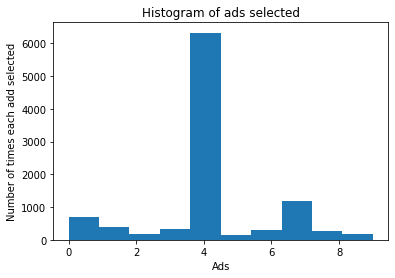

In [5]:
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('Number of times each add selected')
plt.show()